## Support Vector Machine Micro Project
### Dataset obtained from Kaggle: https://www.kaggle.com/uciml/glass/downloads/glass-classification.zip/1

In [155]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler ## for scaling, so we dont have a large bias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix ## metrics used to test our model
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [156]:
data = pd.read_csv('glass.csv')
data.head()



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Variables:
#### Id number: 1 to 214 
#### RI: refractive index
#### Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
#### Mg: Magnesium
#### Al: Aluminum
#### Si: Silicon
#### K: Potassium
#### Ca: Calcium
#### Ba: Barium
#### Fe: Iron
#### Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 #### vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

In [157]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


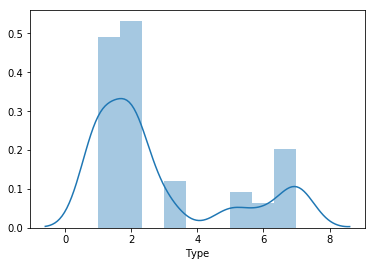

In [173]:
sn.distplot(data['Type']) # shows probability of the different types

## Training the Model

#### In this case, our classification target is set to 'tYPE' and later on we'll manually input data and the model we trained will try to predict which class label it belongs to

In [159]:
from sklearn.model_selection import train_test_split


X = data.iloc[:, 0:8] 
y = data.iloc[:, 9] ## target feature, 10th column ('type')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## train-test ratio is 70-30

In [160]:
from sklearn.svm import SVC

sv = SVC()

a = X_train
b = y_train

sv.fit(a,b)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Results, Predictions and Analysis

In [161]:
prediction = sv.predict(X_test)
print(confusion_matrix(y_test,prediction))

[[19  4  0  0  0  0]
 [ 2 23  0  0  0  0]
 [ 2  2  0  0  0  0]
 [ 0  1  0  5  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  0  1  3]]


In [166]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        23
           2       0.70      0.92      0.79        25
           3       0.00      0.00      0.00         4
           5       1.00      0.83      0.91         6
           6       0.00      0.00      0.00         2
           7       1.00      0.60      0.75         5

   micro avg       0.77      0.77      0.77        65
   macro avg       0.59      0.53      0.55        65
weighted avg       0.73      0.77      0.74        65



C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### As seen above, the model precision is not great(73%). Feature scaling was applied prior and it affected the accuracy rate greatly in a negative manner. Maybe there are other methods that will do better to normalize the data in this case.
### Data variables are confirmed to be highly correlatable to each other, so it might depend on which ML algorithm is most suitable to be implemented for this particular data set. 
### Gathering more data is a no-brainer, given we have few instances, we're bound to have great variance
### Train-test data ratio also may be a factor to keep in mind, it is advisable to experiment with different ratios and see how it pans out. I believe choosing a particular test-train ratio becomes more redundant as the dataset becomes larger
### In our case, we implemented SVM, the goal was not to build a highly robust model with a high accuracy rate but rather try to learn how the algorithm works and how to reason with results achieved and propose alternative methods to tackle the problem. At the end of the day, we work with the data that we have in hand
### A technique that is interesting is paramter tuning, we can do this using Grid Search. This involves scanning the data to configure the best parameters for the model. Certain models require certain parameters. I will do a project later on that will involve taking a noisy dataset, and take it from cleaning phase all the way to analysis phase. I will eventually do another portofolio opposed to this one which will include more complexity to the data analysis


In [180]:
newdata = [1.52,12.81,3.42,1.45,72.35,0.55,8.20,0.15]
temp = np.array(newdata).reshape((1, -1))
print(sv.predict(temp))

##given the manually inputted data, our model predicted that the type that corresponds to the values is '2' which are building windows. 


[2]
